In [20]:
from sklearn.datasets import make_classification
from collections import Counter
import pandas as pd


In [10]:
X, y = make_classification(n_samples=10000, n_features=2, n_classes=2, n_clusters_per_class=1, weights=[0.99],random_state=0, n_informative=2, n_redundant=0)

In [12]:
Counter(y)

Counter({0: 9847, 1: 153})

In [21]:
pd.DataFrame(X)[0]

0       1.474533
1       1.284699
2       1.971417
3       0.724362
4       0.899841
          ...   
9995    0.885387
9996    1.067920
9997    0.503649
9998    0.866827
9999    1.667061
Name: 0, Length: 10000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

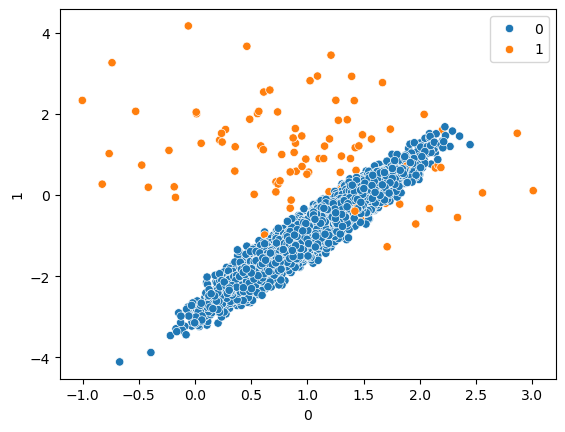

In [22]:
## Visualize the dataset
import pandas as pd
import seaborn as sns
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue=y)

In [23]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [31]:
## Train the model
from sklearn.linear_model import LogisticRegression
class_weight = [{0: w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [32]:
penalty = ['l1', 'l2', 'elasticnet']
c = [100, 10.0, 0.01, 0.001]
random_state = 42
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']


In [34]:
params = dict(
    penalty = penalty,
    C = c,
    solver = solver,
    class_weight = class_weight
)

logs = LogisticRegression()

In [37]:
## hyper paramter turning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = logs, param_grid = params, n_jobs=-1, scoring='accuracy', cv=cv)

In [38]:
grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10.0, 0.01, 0.001],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [39]:
y_pred = grid.predict(X_test)

In [40]:
grid.best_score_

0.990875

In [41]:
grid.best_estimator_

LogisticRegression(C=100, class_weight={0: 10, 1: 50}, penalty='l1',
                   solver='liblinear')

In [45]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = logs, param_distributions= params, n_jobs=-1, scoring='accuracy', cv=cv)


In [46]:
random.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning:

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10.0, 0.01, 0.001],
                                        'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 50},
                                                         {0: 1, 1: 100},
                                                         {0: 10, 1: 1},
                                                         {0: 10, 1: 10},
                                                         {0: 10, 1: 50},
                                                         {0: 10, 1: 100},
                                                         {0: 50, 1: 1},
                                                         {0: 50, 1: 10},
                                                         {0: 50, 1: 50},
                                                         {0: 50, 1: 100},
                                                         {0: 100, 1: 1},
                                                         {0: 100, 1: 10},
                                                         {0: 100, 1: 50},
                                                         {0: 100, 1: 100}],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [47]:
random.best_score_

0.99025